<a href="https://colab.research.google.com/github/edusgr/EDP-1/blob/main/ecuacion_de_onda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Resolución de la ecuación de onda

$$ \frac{∂^2 u}{∂t^2} = c^2 \frac{∂^2 u}{∂x^2} , \hspace{1.0cm} 0<x<L, \hspace{1.0cm} t>0 $$

con condiciones
$$ u(0,t) = u(L,t) = 0  $$
$$ u(x,0) = f(x) $$


$$  \frac{∂ u}{∂t} =0$$


Se utiliza el metodo de separación de variables

De modo que

$$ \frac{T''(t)}{c^2T(t)} = \frac{X''(x)}{X(x)} = -λ $$
se coinsidera que $λ$ es una constante

tenemos la ecuación
$$X''(x) + λ X(x) = 0, \hspace{1.0cm} X(0)=X(L)=0$$

sus soluciones son
     Autovalores: $$λ_n = (\frac{n\pi}{L})^2,  \hspace{1.0cm} n =1,2,3,...$$

  Autofunciones: $$X_n(x) = sin (\frac{n\pi x}{L}) $$

su solución

$$  T''(t) + λ_n c^2 T(t) = 0 $$
$$  T_n(t) = A_n cos (\frac{n\pi ct}{L} ) + B_n(\frac{n\pi ct}{L} )$$


aplicando la series de Fourier se tiene


$$ u(x,t) = \sum_{n=1}^∞ [A_n cos (\frac{n\pi ct}{L} ) + B_n(\frac{n\pi ct}{L} )] sin (\frac{n\pi x}{L})$$


de las condiciones iniciales del problema tenemos

$$ u(x,t) = \sum_{n=1}^∞ A_n cos (\frac{n\pi ct}{L} ) + sin(\frac{n\pi x}{L} ) $$



$$A_n = \frac{2}{L} [ ∫_0^{L/2} \frac{2k}{L} x sin(\frac{n\pi x}{L} ) dx + ∫_{L/2}^{L} \frac{2k}{L} (L-x) sin(\frac{n\pi x}{L} ) dx ]$$

usando un cambio de var5iable y simetría, se obtiene

$A_n = \frac{8k}{\pi^2 n^2} sin(\frac{n\pi}{2})$, si $n$ impar. 0 si $n$ par, por lo que podriamos ahorrarnos los terminos donde $n$ es par


Finalmente la solución de la ecuación tiene la forma

$$ u(x, t) = \sum_{\substack{n=1}}^{\infty} \frac{8k}{\pi^2 n^2} \sin\left(\frac{n\pi}{2}\right) \cos\left(n \pi  c t\right) \sin(n \pi x ) $$




In [31]:
import numpy as np
import matplotlib.pyplot as plt

L = 1
c = 1
kappa = 1
x = np.linspace(0, L, 500)

In [32]:

def f(x):
    return np.where(x < L/2, 2 * kappa * x / L, 2 * kappa * (L - x) / L)

#coeficiente A_n
def bn(n):
    if n % 2 == 0:
        return 0
    else:
        return (8 * kappa / (np.pi**2 * n**2)) * np.sin(n * np.pi / 2)

#términos de Fourier
def fourier_approx(x, N):
    suma = np.zeros_like(x)
    for n in range(1, N+1):
        b = bn(n)
        suma += b * np.sin(n * np.pi * x / L)
    return suma


#sol
def u_xt(x, t, N=20):
    suma = np.zeros_like(x)
    for n in range(1, N+1):
        b = bn(n)
        suma += b * np.sin(n * np.pi * x / L) * np.cos(n * np.pi * c * t / L)
    return suma


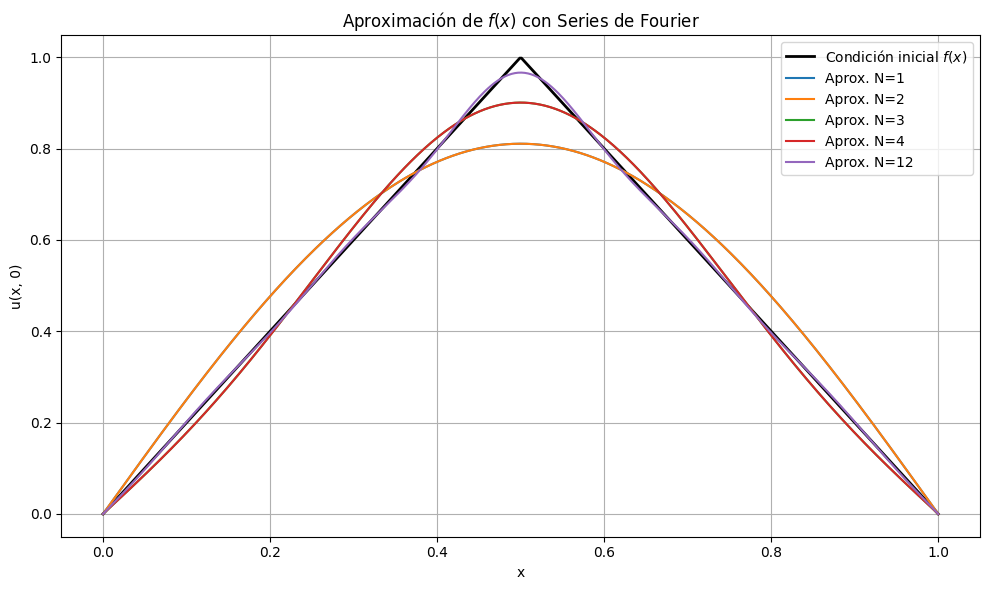

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(x, f(x), label="Condición inicial $f(x)$", linewidth=2, color='black')
for N in [1, 2, 3, 4, 12]:
    plt.plot(x, fourier_approx(x, N), label=f'Aprox. N={N}')
plt.title("Aproximación de $f(x)$ con Series de Fourier")
plt.xlabel("x")
plt.ylabel("u(x, 0)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

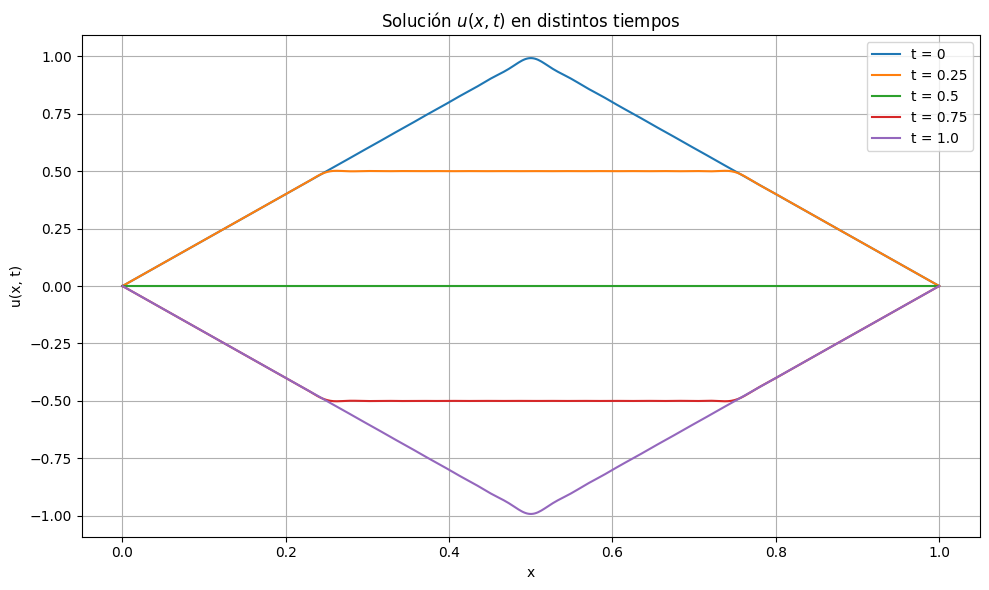

In [34]:
t_vals = [0, 0.25, 0.5, 0.75, 1.0]

plt.figure(figsize=(10, 6))
for t in t_vals:
    plt.plot(x, u_xt(x, t, N=50), label=f't = {t}')
plt.title("Solución $u(x,t)$ en distintos tiempos")
plt.xlabel("x")
plt.ylabel("u(x, t)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
